In [8]:
! git clone https://github.com/tlapinsk/colab-examples.git

Cloning into 'colab-examples'...
remote: Enumerating objects: 64986, done.
remote: Total 64986 (delta 0), reused 0 (delta 0), pack-reused 64986
Receiving objects: 100% (64986/64986), 1.39 GiB | 52.15 MiB/s, done.
Resolving deltas: 100% (47/47), done.
Checking out files: 100% (65776/65776), done.


In [9]:
! ls

colab-examples	sample_data


In [10]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm
from skimage import io, transform
from keras.utils import to_categorical
import time
from sklearn.model_selection import train_test_split
seed = 333
np.random.seed(seed)

import os
print(os.listdir("colab-examples/data"))

['.DS_Store', 'animals-10', 'dogs-vs-cats']


In [11]:
# path to images
img_dir = "colab-examples/data/animals-10"

# list all available images type
print(os.listdir(img_dir))

['dog', 'cat', 'cow', 'elephant', 'horse', 'butteryfly', 'squirrel', 'hen', 'sheep', 'spider']


In [0]:
def load_data(img_dir):
    X = []
    y = []
    labels = []
    idx = 0
    for i,folder_name in enumerate(os.listdir(img_dir)):
#         if folder_name in ( "elephant", "dog", "horse", "squirrel", "hen", "spider", "cat", "sheep", "cow", "butteryfly"):
        if folder_name in ( "elephant", "dog"):
            labels.append(folder_name)
            for file_name in tqdm(os.listdir(f'{img_dir}/{folder_name}')):
                if file_name.endswith('jpeg'):
                    im = io.imread(f'{img_dir}/{folder_name}/{file_name}')
                    if im is not None:
                        im = transform.resize(im, (100, 100))
                        X.append(im)
                        y.append(idx)
        idx+=1
    idx = 2
    for i,folder_name in enumerate(os.listdir(img_dir)):
        if folder_name in ("horse", "squirrel"):
            labels.append(folder_name)
            for file_name in tqdm(os.listdir(f'{img_dir}/{folder_name}')):
                if file_name.endswith('jpeg'):
                    im = io.imread(f'{img_dir}/{folder_name}/{file_name}')
                    if im is not None:
                        im = transform.resize(im, (100, 100))
                        X.append(im)
                        y.append(idx)
    idx = 3
    for i,folder_name in enumerate(os.listdir(img_dir)):
        if folder_name in ("hen", "spider"):
            labels.append(folder_name)
            for file_name in tqdm(os.listdir(f'{img_dir}/{folder_name}')):
                if file_name.endswith('jpeg'):
                    im = io.imread(f'{img_dir}/{folder_name}/{file_name}')
                    if im is not None:
                        im = transform.resize(im, (100, 100))
                        X.append(im)
                        y.append(idx)
    idx = 4
    for i,folder_name in enumerate(os.listdir(img_dir)):
        if folder_name in ("cat", "sheep"):
            labels.append(folder_name)
            for file_name in tqdm(os.listdir(f'{img_dir}/{folder_name}')):
                if file_name.endswith('jpeg'):
                    im = io.imread(f'{img_dir}/{folder_name}/{file_name}')
                    if im is not None:
                        im = transform.resize(im, (100, 100))
                        X.append(im)
                        y.append(idx)
    idx = 5
    for i,folder_name in enumerate(os.listdir(img_dir)):
        if folder_name in ("cow", "butteryfly"):
            labels.append(folder_name)
            for file_name in tqdm(os.listdir(f'{img_dir}/{folder_name}')):
                if file_name.endswith('jpeg'):
                    im = io.imread(f'{img_dir}/{folder_name}/{file_name}')
                    if im is not None:
                        im = transform.resize(im, (100, 100))
                        X.append(im)
                        y.append(idx)
    X = np.asarray(X)
    y = np.asarray(y)
    labels = np.asarray(labels)
    return X,y,labels

In [13]:
X, y, labels = load_data(img_dir)

100%|██████████| 2464/2464 [00:20<00:00, 117.34it/s]


In [0]:
#fix y
y = y.reshape(-1,1)

In [0]:
for i,_ in enumerate(y):
    if y[i] == 1:
        y[i]=0
    else:
        y[i]=1

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [17]:
train_img = X_train
train_labels = y_train
test_img = X_test
test_labels = y_test
train_img.shape, train_labels.shape, test_img.shape, test_labels.shape

((20945, 100, 100, 3), (20945, 1), (5237, 100, 100, 3), (5237, 1))

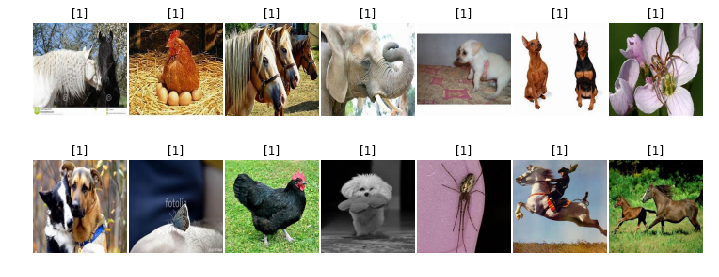

In [18]:
#show random samples
rand_14 = np.random.randint(0, train_img.shape[0],14)
sample_img = train_img[rand_14]
sample_labels = train_labels[rand_14]
num_rows, num_cols = 2, 7
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),gridspec_kw={'wspace':0.03, 'hspace':0.01})
for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_img[image_index])
        ax[r,c].set_title('%s' % sample_labels[image_index])
plt.show()
plt.close()

In [19]:
#one-hot-encode the labels
num_classes = len(labels)
train_labels_cat = to_categorical(train_labels,num_classes)
test_labels_cat = to_categorical(test_labels,num_classes)
train_labels_cat.shape, test_labels_cat.shape

((20945, 10), (5237, 10))

In [20]:
# re-shape the images data
train_data = train_img
test_data = test_img
train_data.shape, test_data.shape

((20945, 100, 100, 3), (5237, 100, 100, 3))

In [21]:
# shuffle the training dataset & set aside val_perc % of rows as validation data
for _ in range(5): 
    indexes = np.random.permutation(len(train_data))

# randomly sorted!
train_data = train_data[indexes]
train_labels_cat = train_labels_cat[indexes]

# now we will set-aside val_perc% of the train_data/labels as cross-validation sets
val_perc = 0.10
val_count = int(val_perc * len(train_data))
print(val_count)

# first pick validation set
val_data = train_data[:val_count,:]
val_labels_cat = train_labels_cat[:val_count,:]

# leave rest in training set
train_data2 = train_data[val_count:,:]
train_labels_cat2 = train_labels_cat[val_count:,:]

train_data2.shape, train_labels_cat2.shape, val_data.shape, val_labels_cat.shape, test_data.shape, test_labels_cat.shape

2094


((18851, 100, 100, 3),
 (18851, 10),
 (2094, 100, 100, 3),
 (2094, 10),
 (5237, 100, 100, 3),
 (5237, 10))

In [0]:
# a utility function that plots the losses and accuracies for training & validation sets across our epochs
def show_plots(history):
    """ Useful function to view plot of loss values & accuracies across the various epochs """
    loss_vals = history['loss']
    val_loss_vals = history['val_loss']
    epochs = range(1, len(history['acc'])+1)
    
    f, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))
    
    # plot losses on ax[0]
    ax[0].plot(epochs, loss_vals, color='navy',marker='o', linestyle=' ', label='Training Loss')
    ax[0].plot(epochs, val_loss_vals, color='firebrick', marker='*', label='Validation Loss')
    ax[0].set_title('Training & Validation Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend(loc='best')
    ax[0].grid(True)
    
    # plot accuracies
    acc_vals = history['acc']
    val_acc_vals = history['val_acc']

    ax[1].plot(epochs, acc_vals, color='navy', marker='o', ls=' ', label='Training Accuracy')
    ax[1].plot(epochs, val_acc_vals, color='firebrick', marker='*', label='Validation Accuracy')
    ax[1].set_title('Training & Validation Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend(loc='best')
    ax[1].grid(True)
    
    plt.show()
    plt.close()
    
    # delete locals from heap before exiting
    del loss_vals, val_loss_vals, epochs, acc_vals, val_acc_vals

In [0]:
def print_time_taken(start_time, end_time):
    secs_elapsed = end_time - start_time
    
    SECS_PER_MIN = 60
    SECS_PER_HR  = 60 * SECS_PER_MIN
    
    hrs_elapsed, secs_elapsed = divmod(secs_elapsed, SECS_PER_HR)
    mins_elapsed, secs_elapsed = divmod(secs_elapsed, SECS_PER_MIN)
    
    if hrs_elapsed > 0:
        print('Time taken: %d hrs %d mins %d secs' % (hrs_elapsed, mins_elapsed, secs_elapsed))
    elif mins_elapsed > 0:
        print('Time taken: %d mins %d secs' % (mins_elapsed, secs_elapsed))
    elif secs_elapsed > 1:
        print('Time taken: %d secs' % (secs_elapsed))
    else:
        print('Time taken - less than 1 sec')

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


import numpy as np
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,Activation,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.datasets import mnist
from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from PIL import Image

In [0]:
#data augmentation
datagen = ImageDataGenerator(
        rotation_range=30,
        zoom_range = 0.25,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

In [26]:
#create multiple cnn model for ensembling
#model 1
model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (100, 100, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Conv2D(256, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

# use adam optimizer and categorical cross entropy cost
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [28]:
# after each epoch decrease learning rate by 0.95
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

# train
epochs = 10
j=0
start_time = time.time()
history = model.fit_generator(datagen.flow(train_data2, train_labels_cat2, batch_size=64),epochs = epochs, steps_per_epoch = train_data2.shape[0]/64,validation_data = (val_data, val_labels_cat), callbacks=[annealer], verbose=1)
end_time = time.time()
print_time_taken(start_time, end_time)


print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(j+1,epochs,history.history['acc'][epochs-1],history.history['val_acc'][epochs-1]))

Epoch 1/10
295/294 [==============================] - 65s 222ms/step - loss: 0.0542 - acc: 0.9845 - val_loss: 4.4436e-07 - val_acc: 1.0000
Epoch 2/10
295/294 [==============================] - 64s 217ms/step - loss: 2.1863e-06 - acc: 1.0000 - val_loss: 1.6606e-07 - val_acc: 1.0000
Epoch 3/10
295/294 [==============================] - 64s 217ms/step - loss: 2.7553e-06 - acc: 1.0000 - val_loss: 1.3666e-07 - val_acc: 1.0000
Epoch 4/10
295/294 [==============================] - 64s 217ms/step - loss: 4.3292e-07 - acc: 1.0000 - val_loss: 1.3580e-07 - val_acc: 1.0000
Epoch 5/10
295/294 [==============================] - 64s 217ms/step - loss: 4.8003e-07 - acc: 1.0000 - val_loss: 1.3017e-07 - val_acc: 1.0000
Epoch 6/10
295/294 [==============================] - 64s 216ms/step - loss: 5.9662e-07 - acc: 1.0000 - val_loss: 1.2812e-07 - val_acc: 1.0000
Epoch 7/10
295/294 [==============================] - 64s 217ms/step - loss: 4.8400e-07 - acc: 1.0000 - val_loss: 1.2544e-07 - val_acc: 1.0000
Epo

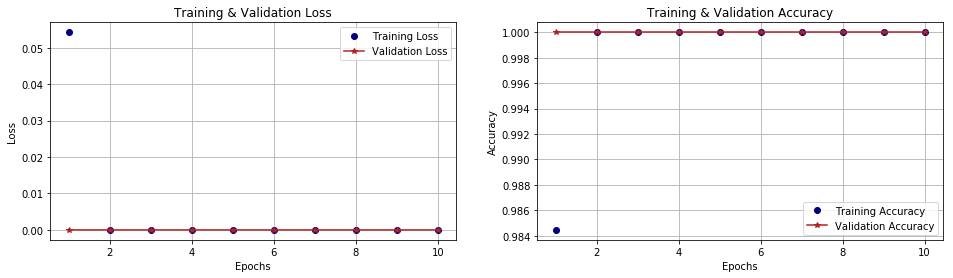

In [29]:
show_plots(history.history)